## EDA

### Loading libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
actions = pd.read_excel("data/actions.xlsx")

In [15]:
actions.head()

,action_id,action_type_label,action_subcategory_label,action_start_date,action_year,action_end_date,action_collection_year,action_collection,action_universe,action_category_label,action_channel,action_label,client_id,client_is_present,client_is_invited
0,a654760,Collection,Collection,2022-04-07,2022,2022-04-11,2022,Mid-Season Jewelry and Timepieces,Timepieces and Jewelry,Retail,In store,Exclusive Offer,c23083988,1,1
1,a979979,Collection,Collection,2021-10-20,2021,2021-10-21,2021,Sailor Collection,Women's Fashion,Retail,In store,Exclusive Offer,c40865409,1,1
2,a803469,Collection,Collection,2020-10-29,2020,2020-10-29,2020,Spring Collection,Men's Fashion,Retail,In store,Social Gathering,c95435465,1,1
3,a887515,Collection,Collection,2022-01-11,2022,2022-01-11,2022,Formal Retail Action,Men's Fashion,Retail,In store,Social Gathering,c58792918,1,1
4,a233620,Collection,Collection,2021-05-27,2021,2021-06-21,2021,Mid-Season Jewelry and Timepieces,Timepieces and Jewelry,Retail,NaN,Exclusive Offer,c34394230,1,1


In [18]:
actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   action_id                 10000 non-null  object        
 1   action_type_label         10000 non-null  object        
 2   action_subcategory_label  10000 non-null  object        
 3   action_start_date         10000 non-null  datetime64[ns]
 4   action_year               10000 non-null  int64         
 5   action_end_date           10000 non-null  datetime64[ns]
 6   action_collection_year    10000 non-null  int64         
 7   action_collection         9999 non-null   object        
 8   action_universe           10000 non-null  object        
 9   action_category_label     10000 non-null  object        
 10  action_channel            8689 non-null   object        
 11  action_label              10000 non-null  object        
 12  client_id          

In [19]:
clients = pd.read_excel('data/clients.xlsx')

In [20]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28751 entries, 0 to 28750
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   client_id                                28751 non-null  object
 1   client_country                           19095 non-null  object
 2   client_gender                            12544 non-null  object
 3   client_nationality                       12601 non-null  object
 4   client_city                              10487 non-null  object
 5   client_premium_status                    28751 non-null  int64 
 6   client_is_phone_contactable              28751 non-null  int64 
 7   client_is_email_contactable              28751 non-null  int64 
 8   client_is_instant_messaging_contactable  28751 non-null  int64 
 9   client_is_contactable                    28751 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 2.2+ MB


In [21]:
clients.head()

,client_id,client_country,client_gender,client_nationality,client_city,client_premium_status,client_is_phone_contactable,client_is_email_contactable,client_is_instant_messaging_contactable,client_is_contactable
0,c41404743,BN,NaN,NaN,NaN,0,0,0,1,1
1,c65630254,CA,NaN,NaN,NaN,0,0,0,1,1
2,c89796498,NL,NaN,NaN,NaN,0,0,0,1,1
3,c03959902,SE,NaN,NaN,NaN,0,0,0,1,1
4,c39809280,BG,NaN,NaN,NaN,0,0,0,1,1


In [22]:
transactions = pd.read_excel('data/transactions.xlsx')

In [24]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54638 entries, 0 to 54637
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   client_id            54638 non-null  object        
 1   transaction_id       54638 non-null  object        
 2   transaction_date     54638 non-null  datetime64[ns]
 3   product_quantity     54638 non-null  int64         
 4   gross_amount_euro    54638 non-null  int64         
 5   product_category     54638 non-null  object        
 6   product_subcategory  54638 non-null  object        
 7   product_style        54631 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 3.3+ MB


In [30]:
actions['client_id'].nunique()

8871

In [23]:
transactions.head()

,client_id,transaction_id,transaction_date,product_quantity,gross_amount_euro,product_category,product_subcategory,product_style
0,c17974679,t11288118,2020-07-25,1,3044,Women Ready-to-Wear,Unknown,Casual Style
1,c17974679,t93389142,2020-06-20,1,569,Women Accessory,Unknown,Stylish Fashion
2,c17974679,t62924895,2021-01-13,1,7727,Women Bags,Unknown,Leather
3,c17974679,t93389142,2020-06-20,1,3954,Women Ready-to-Wear,Unknown,Casual Style
4,c17974679,t33368160,2021-05-03,1,1541,Women Ready-to-Wear,bottom segment,Casual Style


### Dataframes shapes

In [27]:
print(f"The ACTIONS dataframe has {actions.shape[1]} features and {actions.shape[0]} entries.")
print(f"The CLIENTS dataframe has {clients.shape[1]} features and {clients.shape[0]} entries.")
print(f"The TRANSACTIONS dataframe has {transactions.shape[1]} features and {transactions.shape[0]} entries.")

The ACTIONS dataframe has 15 features and 10000 entries.
The CLIENTS dataframe has 10 features and 28751 entries.
The TRANSACTIONS dataframe has 8 features and 54638 entries.


### Unique clients

In [31]:
transactions['client_id'].nunique()

13884

In [32]:
clients['client_id'].nunique()

28751

In [40]:
print(f"Percentage of clients having made transactions: {round(transactions['client_id'].nunique() / clients['client_id'].nunique(), 3)*100}%")

Percentage of clients having made transactions: 48.3%


In [42]:
transactions['gross_amount_euro'].mean()

np.float64(3443.0228778505802)

In [43]:
actions['client_id'].nunique()

8871

In [45]:
actions['client_is_invited'].value_counts()

client_is_invited
1    10000
Name: count, dtype: int64

In [44]:
actions['client_is_present'].value_counts()

client_is_present
1    5437
0    4563
Name: count, dtype: int64

In [55]:
import numpy as np

In [62]:
clients_present = actions[actions['client_is_present'] == 1]
clients_present_list = list(clients_present['client_id'])

In [64]:
transactions['client_id'].shape[0]

54638

In [66]:
len(clients_present_list)

5437

In [63]:
clients_present_transactions = []
n = transactions['client_id'].shape[0]
for i in range(n):
    if transactions['client_id']

SyntaxError: expected ':' (2256954215.py, line 3)

In [61]:
clients_present_no_transactions = []

In [53]:
merged_1.shape

(63502, 8)

In [67]:
transactions['client_id'].nunique()

13884

In [68]:
actions['client_id'].nunique()

8871

In [156]:
transactions_groupedby = transactions.groupby('client_id', as_index=False)['gross_amount_euro'].count()

In [157]:
transactions_groupedby

,client_id,gross_amount_euro
0,c00029531,3
1,c00055636,2
2,c00068475,2
3,c00089184,5
4,c00091299,1
...,...,...
13879,c99976540,7
13880,c99978675,2
13881,c99989096,1
13882,c99995560,1


In [173]:
merged_df = pd.merge(left=actions, right=transactions_groupedby, on='client_id', how='left').fillna(0)

In [174]:
merged_df

,action_id,action_type_label,action_subcategory_label,action_start_date,action_year,action_end_date,action_collection_year,action_collection,action_universe,action_category_label,action_channel,action_label,client_id,client_is_present,client_is_invited,gross_amount_euro
0,a654760,Collection,Collection,2022-04-07,2022,2022-04-11,2022,Mid-Season Jewelry and Timepieces,Timepieces and Jewelry,Retail,In store,Exclusive Offer,c23083988,1,1,0.0
1,a979979,Collection,Collection,2021-10-20,2021,2021-10-21,2021,Sailor Collection,Women's Fashion,Retail,In store,Exclusive Offer,c40865409,1,1,0.0
2,a803469,Collection,Collection,2020-10-29,2020,2020-10-29,2020,Spring Collection,Men's Fashion,Retail,In store,Social Gathering,c95435465,1,1,0.0
3,a887515,Collection,Collection,2022-01-11,2022,2022-01-11,2022,Formal Retail Action,Men's Fashion,Retail,In store,Social Gathering,c58792918,1,1,0.0
4,a233620,Collection,Collection,2021-05-27,2021,2021-06-21,2021,Mid-Season Jewelry and Timepieces,Timepieces and Jewelry,Retail,0,Exclusive Offer,c34394230,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,a970430,Collection,Collection,2021-07-15,2021,2021-07-17,2021,Fall Collection,Women's Fashion,Retail,0,Exclusive Offer,c63326165,0,1,8.0
9996,a970430,Collection,Collection,2021-07-15,2021,2021-07-17,2021,Fall Collection,Women's Fashion,Retail,0,Exclusive Offer,c63246368,0,1,7.0
9997,a970430,Collection,Collection,2021-07-15,2021,2021-07-17,2021,Fall Collection,Women's Fashion,Retail,0,Exclusive Offer,c14103687,0,1,4.0
9998,a970430,Collection,Collection,2021-07-15,2021,2021-07-17,2021,Fall Collection,Women's Fashion,Retail,0,Exclusive Offer,c93496667,0,1,5.0


In [175]:
merged_df['client_id'].nunique()

8871

### number of clients present

In [177]:
merged_df[merged_df['client_is_present'] == 1].client_id.nunique()

4508

### number of clients who were present to event and made a transaction of positive amount: 2651

In [178]:
clients_present_transac = merged_df[(merged_df['client_is_present'] == 1) & (merged_df['gross_amount_euro'] > 0)]

In [179]:
clients_present_transac['client_id'].nunique()

2651

### number of clients who were present to event and made no transaction= 64

In [182]:
clients_present_notransac = merged_df[(merged_df['client_is_present'] == 1) & (merged_df['gross_amount_euro'] == 0)]

In [183]:
clients_present_notransac['client_id'].nunique()

1857

### bar plot: proportion of clients present 

In [199]:
heights = [merged_df[merged_df['client_is_present'] == 1].client_id.nunique(), clients_present_transac['client_id'].nunique(), clients_present_notransac['client_id'].nunique()]

In [197]:
to_plot = ['Clients present', 'Present & Transaction > 0', 'No transaction']

[Text(0, 0, '4,508'), Text(0, 0, '2,651'), Text(0, 0, '1,857')]

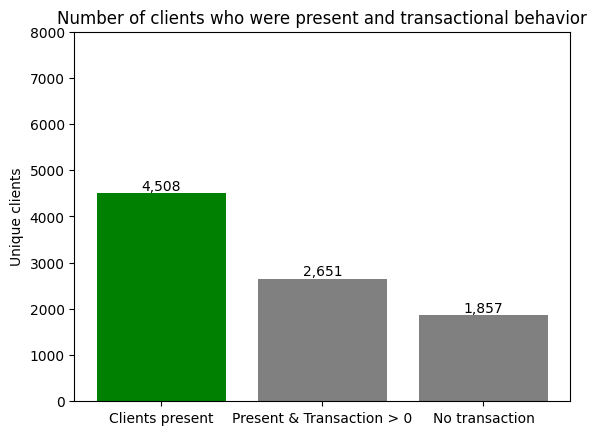

In [213]:
fig, ax = plt.subplots()
bar_container = ax.bar(to_plot, heights, color=['green', 'grey', 'grey'])
ax.set(ylabel='Unique clients', title='Number of clients who were present and transactional behavior', ylim=(0, 8000))
ax.bar_label(bar_container, fmt='{:,.0f}')

## bar plot big

In [214]:
to_plot2 = ['Total Clients', 'Presence == 1', 'Presence == 0']
heights2 = [merged_df['client_id'].nunique(), merged_df[merged_df['client_is_present'] == 1].client_id.nunique(),
            merged_df[merged_df['client_is_present'] == 0].client_id.nunique()]

[Text(0, 0, '8,871'), Text(0, 0, '4,508'), Text(0, 0, '4,423')]

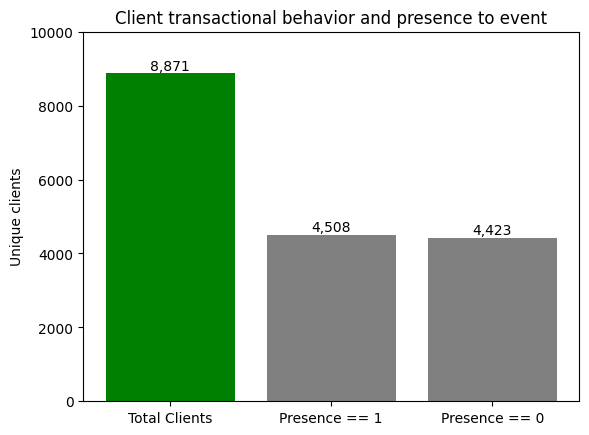

In [223]:
fig, ax = plt.subplots()
bar_container = ax.bar(to_plot2, heights2, color=['green', 'grey', 'grey'])
ax.set(ylabel='Unique clients', title='Client transactional behavior and presence to event', ylim=(0, 10000))
ax.bar_label(bar_container, fmt='{:,.0f}')

In [225]:
merged_df[merged_df['gross_amount_euro']==0].client_id.nunique()

4880

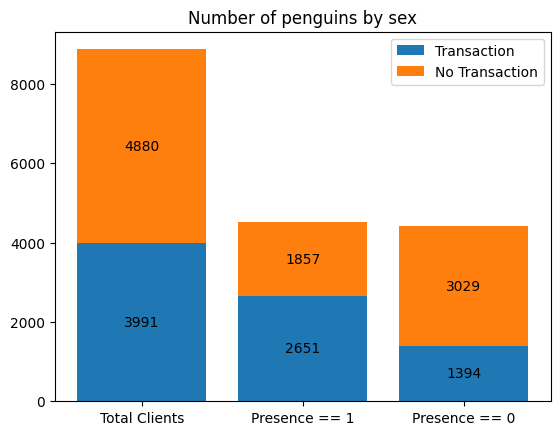

In [227]:
transactions_counts = {
    'Transaction': np.array([3991, 2651, 1394]),
    'No Transaction': np.array([4880, 1857, 3029]),
}

fig, ax = plt.subplots()
bottom = np.zeros(3)

for transac, transac_count in transactions_counts.items():
    p = ax.bar(to_plot2, transac_count, label=transac, bottom=bottom)
    bottom += transac_count

    ax.bar_label(p, label_type='center')

ax.set_title('Number of penguins by sex')
ax.legend()

plt.show()

In [220]:
heights2

[8871, 4508, 4423]

In [219]:
merged_df['client_is_present'].value_counts()

client_is_present
1    5437
0    4563
Name: count, dtype: int64

In [216]:
4423 + 4508

8931

### number of clients who were not present to event and made a transac = 1394

In [185]:
clients_notpresent_transac = merged_df[(merged_df['client_is_present'] == 0) & (merged_df['gross_amount_euro'] > 0)]

In [186]:
clients_notpresent_transac['client_id'].nunique()

1394

### number of clients who were not present to event and made no transaction= 27

In [187]:
clients_notpresent_notransac = merged_df[(merged_df['client_is_present'] == 0) & (merged_df['gross_amount_euro'] == 0)]

In [188]:
clients_notpresent_notransac['client_id'].nunique()

3029

In [189]:
merged_df['client_id'].nunique()

8871

In [190]:
merged_df.shape

(10000, 16)